# Actividad: Deep Learning

### Jose Pablo Cobos Austria        A01274631

#### 1.- Importar librerias 

In [1]:
import numpy  as np 
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf 
from tqdm import tqdm

2022-11-25 21:56:27.144532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 21:56:27.577805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 21:56:27.577820: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-25 21:56:28.666700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dl

#### 2.- Carga de los datos 

In [2]:
class_names = ["Rectangulo_Liso_Largo_N°24",
"Cuadrado_Armar_Grande_N°39",
"Conector_Liso_Pequeño_N°27",
"Bloque_Liso_Mediano_N°30",
"Bloque_Liso_LargoN°24",
"Bloque_Liso_Largo_N°31",]
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (150,150)

{'Rectangulo_Liso_Largo_N°24': 0, 'Cuadrado_Armar_Grande_N°39': 1, 'Conector_Liso_Pequeño_N°27': 2, 'Bloque_Liso_Mediano_N°30': 3, 'Bloque_Liso_LargoN°24': 4, 'Bloque_Liso_Largo_N°31': 5}


In [3]:
def load_data():
    DIRECTORY = r"/home/josecobos/Documentos/Escuela/IA_Parte2/Modulo_2/data/data2"
    CATEGORY = ["seg_train","seg_test"]
    output = []

    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        #print(path)
        images = []
        labels = []

        print("Loading {}".format(category))

        #print(os.listdir(path))

        for folder in os.listdir(path):
            print(folder)

            label = class_names_label[folder]

            #print(os.listdir(os.path.join(path,folder)))

            for file in os.listdir(os.path.join(path,folder)):

                img_path = os.path.join(os.path.join(path,folder),file)

                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                images.append(image)
                labels.append(label)

                #print(images)

        images = np.array(images, dtype= 'float32')
        labels = np.array(labels, dtype= 'int32')

        output.append((images,labels))
    
    return output

        

In [4]:
(train_images, train_labels), (test_images,test_labels) = load_data()

Loading seg_train
Bloque_Liso_Largo_N°31
Cuadrado_Armar_Grande_N°39
Bloque_Liso_Mediano_N°30
Bloque_Liso_LargoN°24
Rectangulo_Liso_Largo_N°24
Conector_Liso_Pequeño_N°27
Loading seg_test
Bloque_Liso_Largo_N°31
Cuadrado_Armar_Grande_N°39
Bloque_Liso_Mediano_N°30
Bloque_Liso_LargoN°24
Rectangulo_Liso_Largo_N°24
Conector_Liso_Pequeño_N°27


#### 3.- Analisis de los datos

In [5]:
train_images,train_labels = shuffle(train_images,train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 9000
Number of testing examples: 600
Each image is of size: (150, 150)


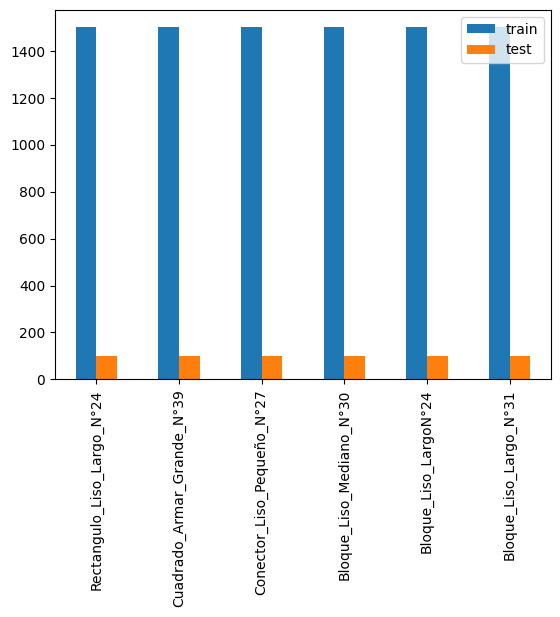

In [7]:

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()



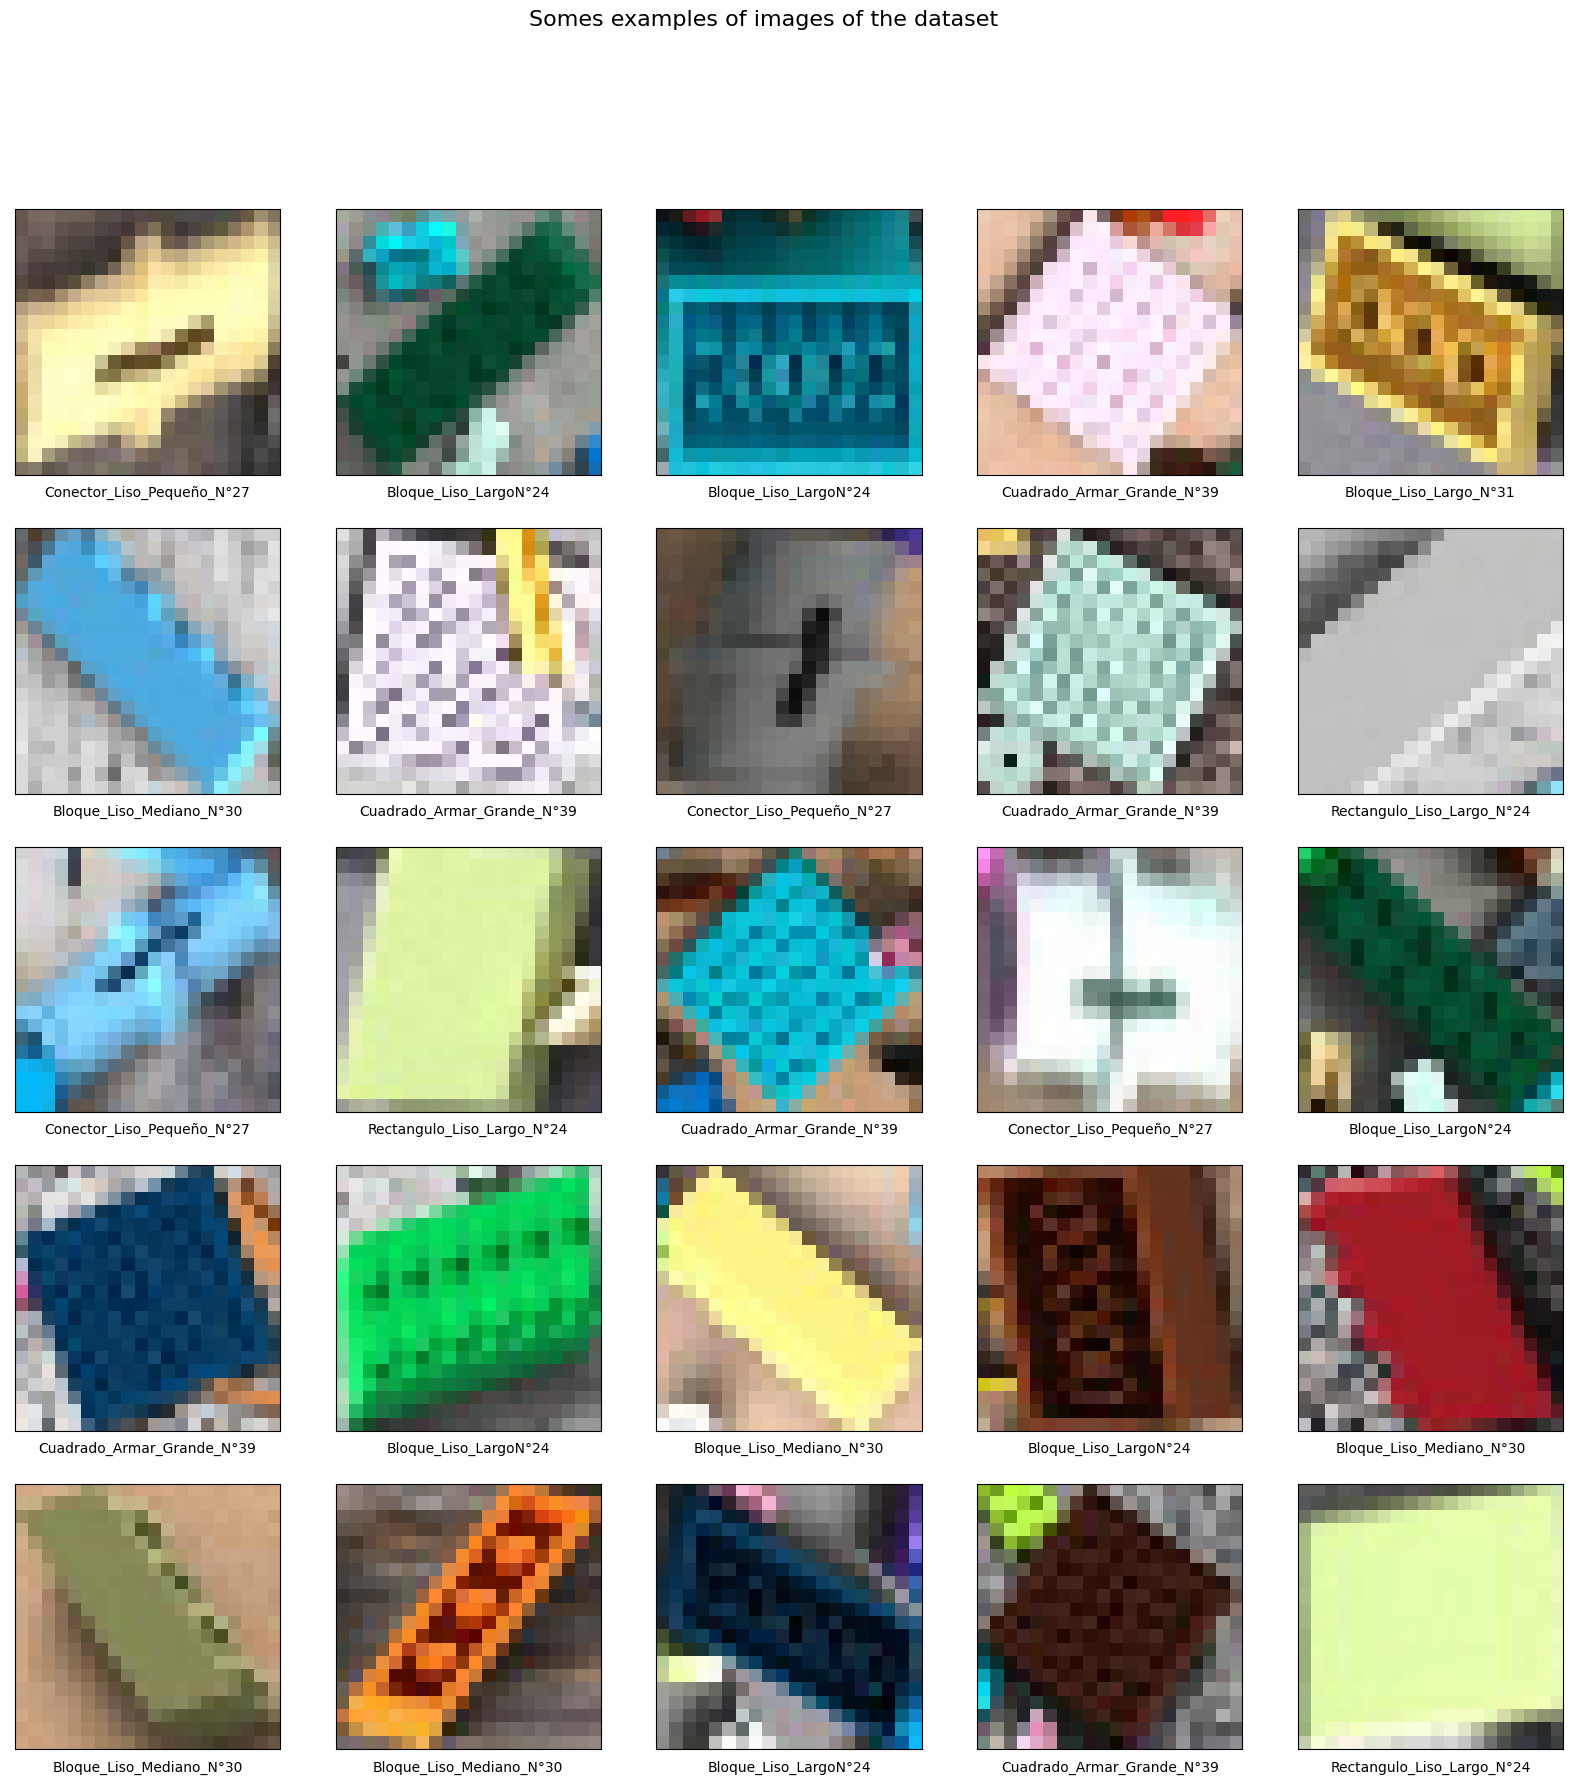

In [8]:
def display_examples(class_names, images, labels):
    figsize = (20,20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Somes examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.resize(images[i],figsize)
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(class_names[labels[i]])

    plt.show()

display_examples(class_names,train_images,train_labels)


#### 5.- Generacion de modelo

##### Modelo 1

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)

])

2022-11-25 21:56:38.210084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 21:56:38.210463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 21:56:38.210572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 21:56:38.210661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could 

In [10]:
model1.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model1.fit(train_images,train_labels,batch_size=256,epochs=4,validation_split= .2)

Epoch 1/4


2022-11-25 21:56:40.385282: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1944000000 exceeds 10% of free system memory.
2022-11-25 21:56:41.523444: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.
2022-11-25 21:56:42.093751: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.


 1/29 [>.............................] - ETA: 59s - loss: 76.0207 - accuracy: 0.1602

2022-11-25 21:56:42.984650: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.
2022-11-25 21:56:43.535376: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.


29/29 [==============================] - 44s 2s/step - loss: 2474.5898 - accuracy: 0.1667 - val_loss: 39.4677 - val_accuracy: 0.1894
Epoch 2/4
29/29 [==============================] - 41s 1s/step - loss: 10.4072 - accuracy: 0.1806 - val_loss: 2.0962 - val_accuracy: 0.1756
Epoch 3/4
29/29 [==============================] - 40s 1s/step - loss: 1.8653 - accuracy: 0.1675 - val_loss: 2.0652 - val_accuracy: 0.1756
Epoch 4/4
29/29 [==============================] - 41s 1s/step - loss: 1.8229 - accuracy: 0.1660 - val_loss: 1.8442 - val_accuracy: 0.1728


##### Modelo 2

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)

])

2022-11-25 11:45:29.057007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 11:45:29.057455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 11:45:29.058857: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/josecobos/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 11:45:29.058935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could 

In [10]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_images,train_labels,batch_size=128,epochs=10,validation_split= .2)

Epoch 1/10


2022-11-25 11:45:34.314505: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1944000000 exceeds 10% of free system memory.
2022-11-25 11:45:35.777885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-11-25 11:45:36.634810: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


 1/57 [..............................] - ETA: 1:50 - loss: 23.9284 - accuracy: 0.1953

2022-11-25 11:45:37.141925: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.
2022-11-25 11:45:37.953721: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 358875136 exceeds 10% of free system memory.


57/57 [==============================] - 65s 1s/step - loss: 58.6186 - accuracy: 0.1725 - val_loss: 1.7921 - val_accuracy: 0.1689
Epoch 2/10
57/57 [==============================] - 67s 1s/step - loss: 1.7914 - accuracy: 0.1636 - val_loss: 1.7961 - val_accuracy: 0.1622
Epoch 3/10
57/57 [==============================] - 69s 1s/step - loss: 1.7911 - accuracy: 0.1692 - val_loss: 1.7943 - val_accuracy: 0.1617
Epoch 4/10
57/57 [==============================] - 71s 1s/step - loss: 1.7903 - accuracy: 0.1707 - val_loss: 1.7958 - val_accuracy: 0.1622
Epoch 5/10
57/57 [==============================] - 70s 1s/step - loss: 1.7893 - accuracy: 0.1668 - val_loss: 1.7939 - val_accuracy: 0.1633
Epoch 6/10
57/57 [==============================] - 72s 1s/step - loss: 1.7867 - accuracy: 0.1758 - val_loss: 1.7860 - val_accuracy: 0.1650
Epoch 7/10
57/57 [==============================] - 68s 1s/step - loss: 1.7579 - accuracy: 0.1957 - val_loss: 1.7377 - val_accuracy: 0.2222
Epoch 8/10
57/57 [============

#### 8.-  Implementacion de mejoras al modelo

#### 7.- Validacion del modelo